# Task 2

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
df = pd.read_csv('Titanic.csv') 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


  # Check for missing values

In [88]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Create new features

In [91]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


# Convert columns

In [57]:
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

 # Correlation Heatmap

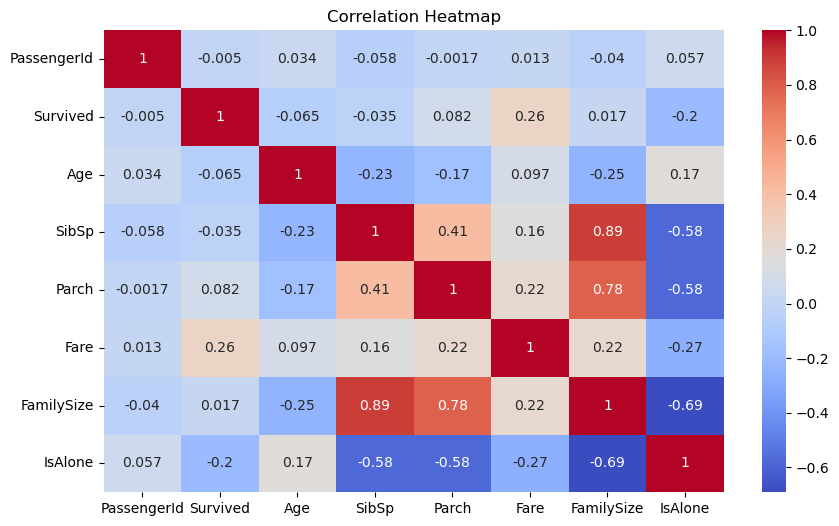

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Survival Count

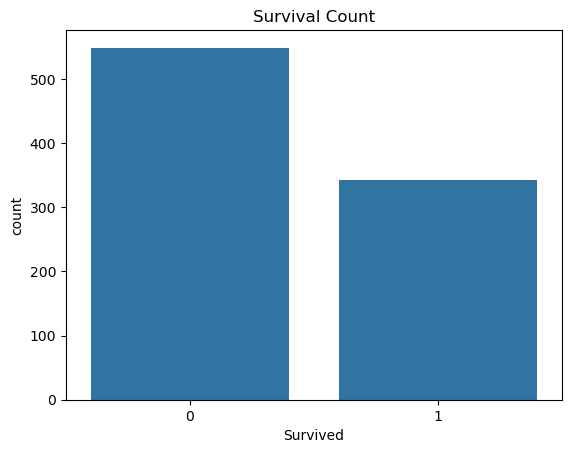

In [63]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()


# Found that Fare, Pclass, and Sex correlate with survival.

# Survival by Gender

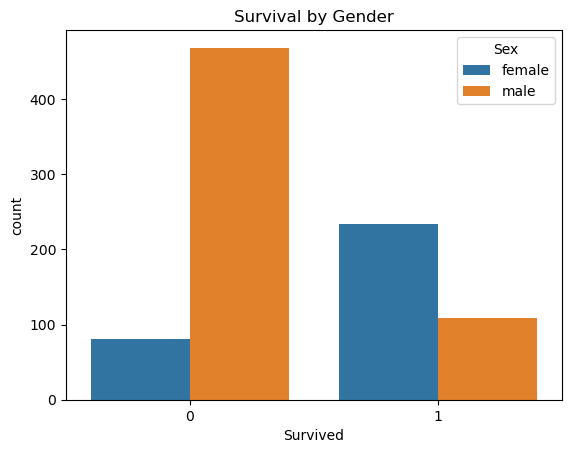

In [66]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()


# Women had a much higher survival rate than men.

# Survival by Class

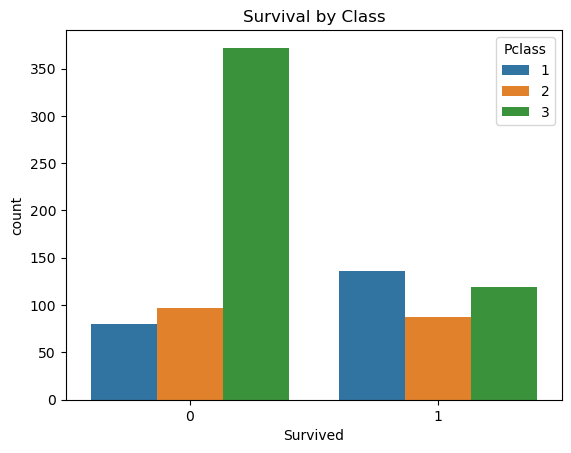

In [69]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Class')
plt.show()


# 1st-class passengers had a higher survival rate than 2nd and 3rd class.

# Age Distribution by Survival

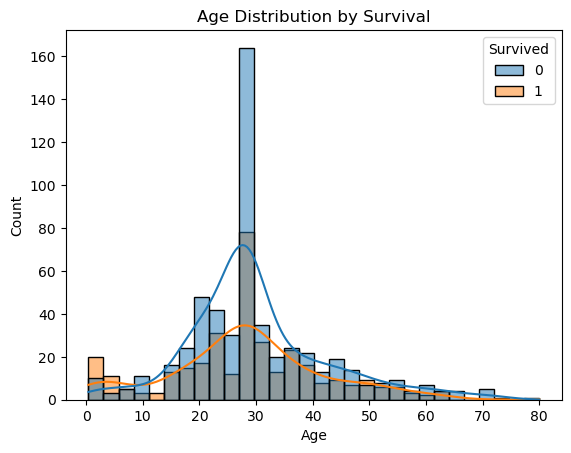

In [71]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()


# Younger passengers, especially children, had better chances of survival.

# Embarked vs Survival

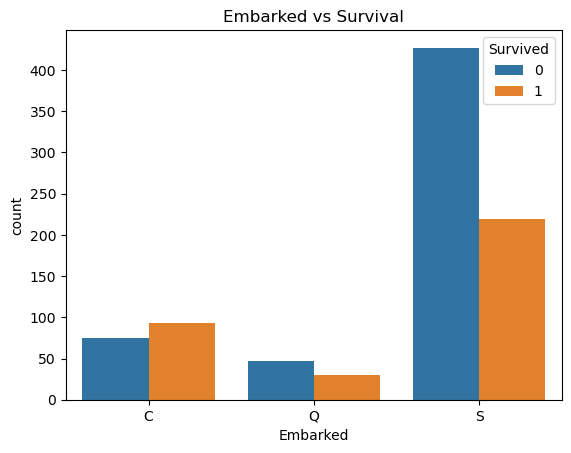

In [74]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survival')
plt.show()


# Passengers from Cherbourg (C) survived the most, Southampton (S) the least.

# Family Size vs Survival

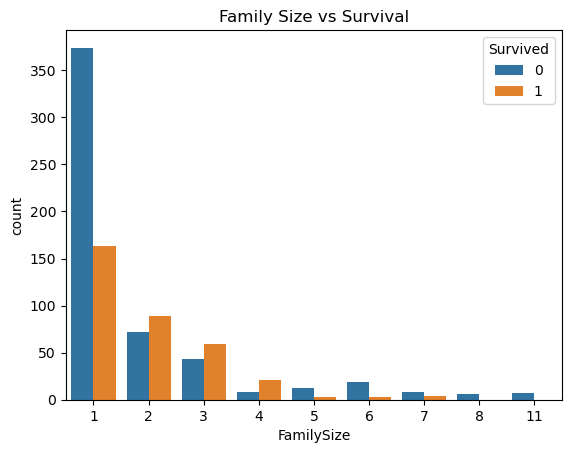

In [76]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Family Size vs Survival')
plt.show()


# Medium family sizes had higher survival; solo and large families had lower.